### Binary Traffic Sign Classification


In [1]:
import os
import cv2
from time import time
import numpy as np
from sklearn.utils import shuffle

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 6]

#### Data Loading

Let's now load the data to see what we are dealing with.

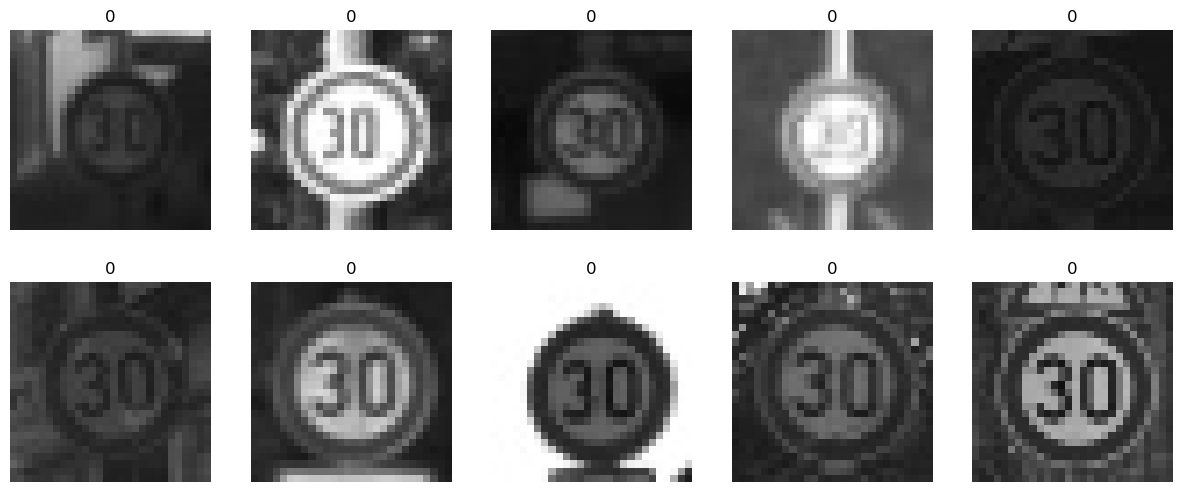

In [2]:
folder = '../data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

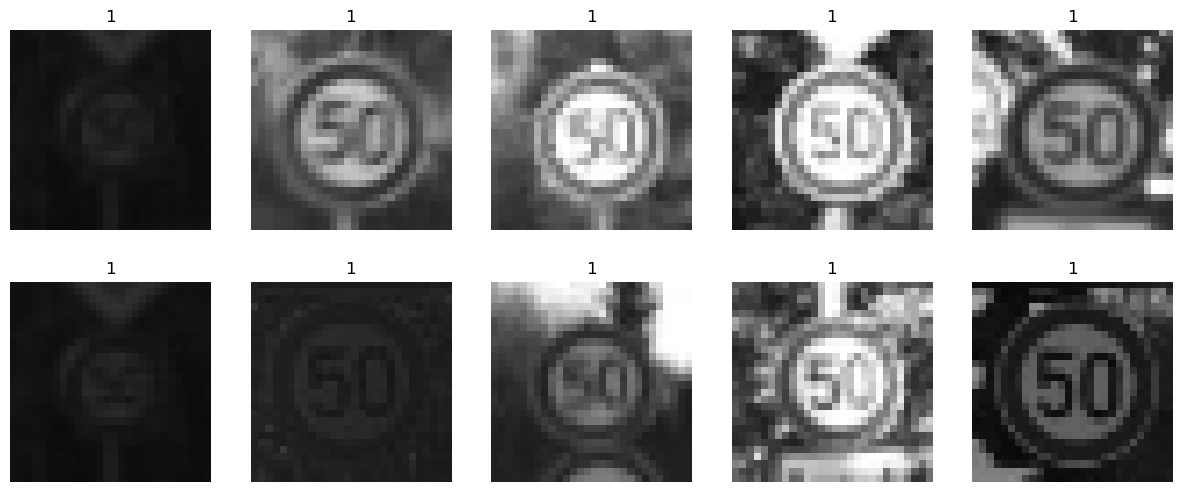

In [3]:
# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2,5,cnt+1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

In [4]:
print('Num samples class_0', len(images_0))
print('Num samples class_1', len(images_1))

Num samples class_0 2220
Num samples class_1 2250


#### Prepare Input Data

To train our neural network model, we have to prepare the data to the format the the model actually expects. In our case, this will be numpy arrays.

In [5]:
# Put both classes together and shuffle the data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)

images = np.array(images)
labels = np.array(labels)

print('Images', images.shape)
print('Labels', labels.shape)

Images (4470, 28, 28)
Labels (4470,)


In [7]:
start = time()
pixels = np.array([image.flatten() for image in images])/255
stop = time()

print('Shape', pixels.shape)
print('Elapsed time', stop - start)

Shape (4470, 784)
Elapsed time 0.03689837455749512


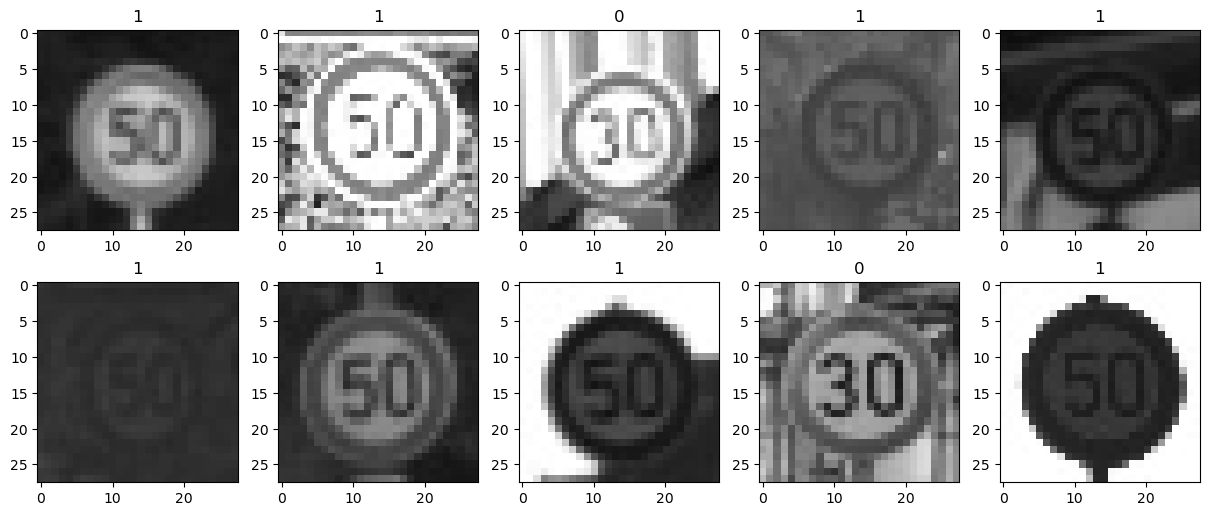

In [8]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)):    
    plt.subplot(2,5,cnt+1)
    plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels[idx])

In [26]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input

In [27]:
# Building the Neural Network

inputs = Input(shape=(pixels.shape[1]))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.summary()



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 785       
                                                                 
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [28]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=10, batch_size=32)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/10
140/140 [==============================] - 1s 2ms/step - loss: 0.2948
Epoch 2/10
140/140 [==============================] - 0s 2ms/step - loss: 0.2210
Epoch 3/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1842
Epoch 4/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1560
Epoch 5/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1382
Epoch 6/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1245
Epoch 7/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1162
Epoch 8/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1076
Epoch 9/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1036
Epoch 10/10
140/140 [==============================] - 0s 2ms/step - loss: 0.1005


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

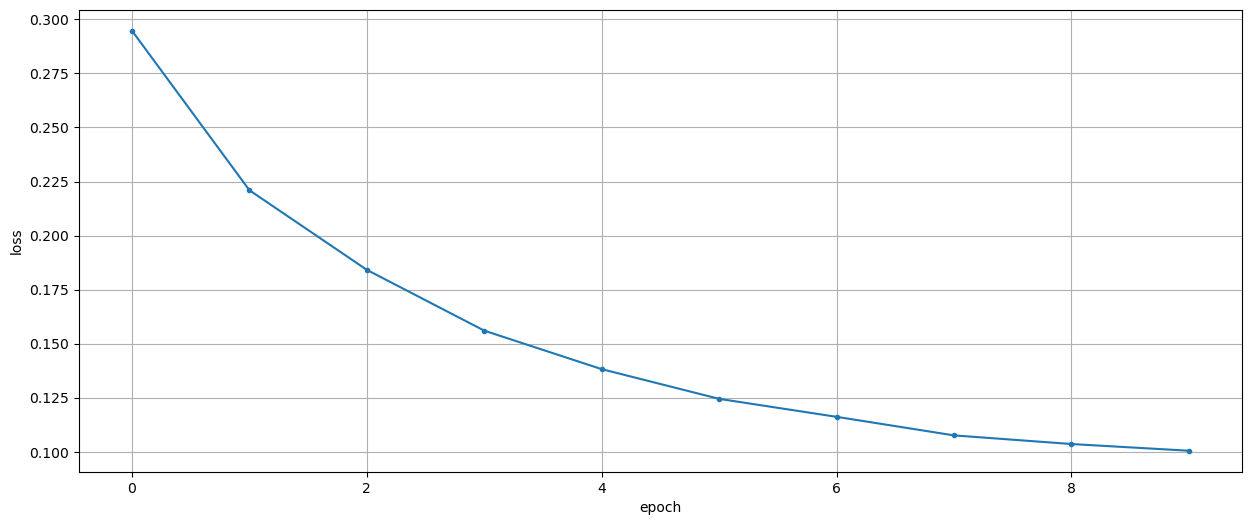

In [29]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[0.40855092] [0.40855092]


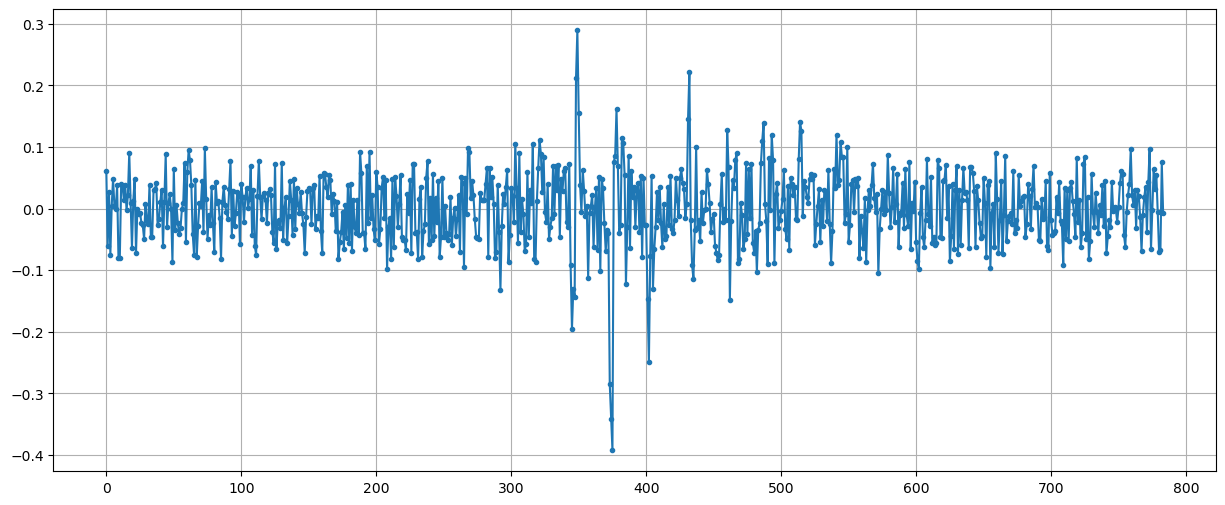

In [30]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [31]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 79ms/step
[[0.09730831]] 0


In [32]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 1ms/step


In [33]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9203579418344519


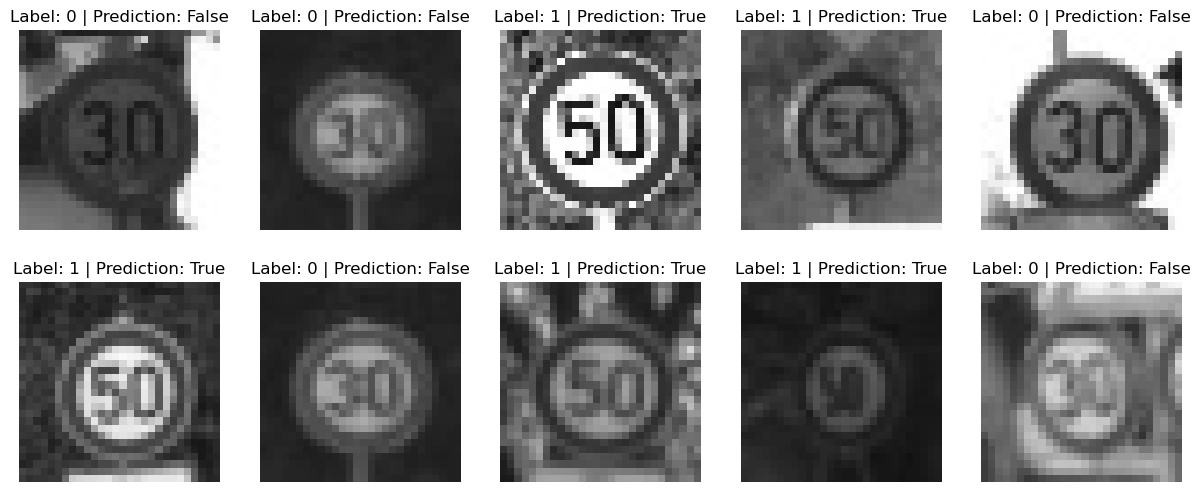

In [34]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)


# STEP 3

In [61]:

# Building the Neural Network

inputs = Input(shape=(pixels.shape[1]))
hiden = Dense(10, activation="relu")(inputs)
outputs = Dense(1, activation="linear")(hiden)
model = Model(inputs, outputs)

model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 10)                7850      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 7,861
Trainable params: 7,861
Non-trainable params: 0
_________________________________________________________________


In [62]:
tf.keras.utils.plot_model(model, to_file="model_2.png", show_shapes=True, show_layer_names=True)
model.compile(optimizer ='adam', loss = 'mean_squared_error')
history = model.fit(pixels, labels, epochs=100, batch_size=32)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
140/140 [==============================] - 1s 3ms/step - loss: 0.2996
Epoch 2/100
140/140 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 3/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1496
Epoch 4/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1215
Epoch 5/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1032
Epoch 6/100
140/140 [==============================] - 0s 3ms/step - loss: 0.1002
Epoch 7/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0927
Epoch 8/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0890
Epoch 9/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0814
Epoch 10/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0780
Epoch 11/100
140/140 [========

140/140 [==============================] - 0s 3ms/step - loss: 0.0327
Epoch 99/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0334
Epoch 100/100
140/140 [==============================] - 0s 3ms/step - loss: 0.0324


(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'loss'))

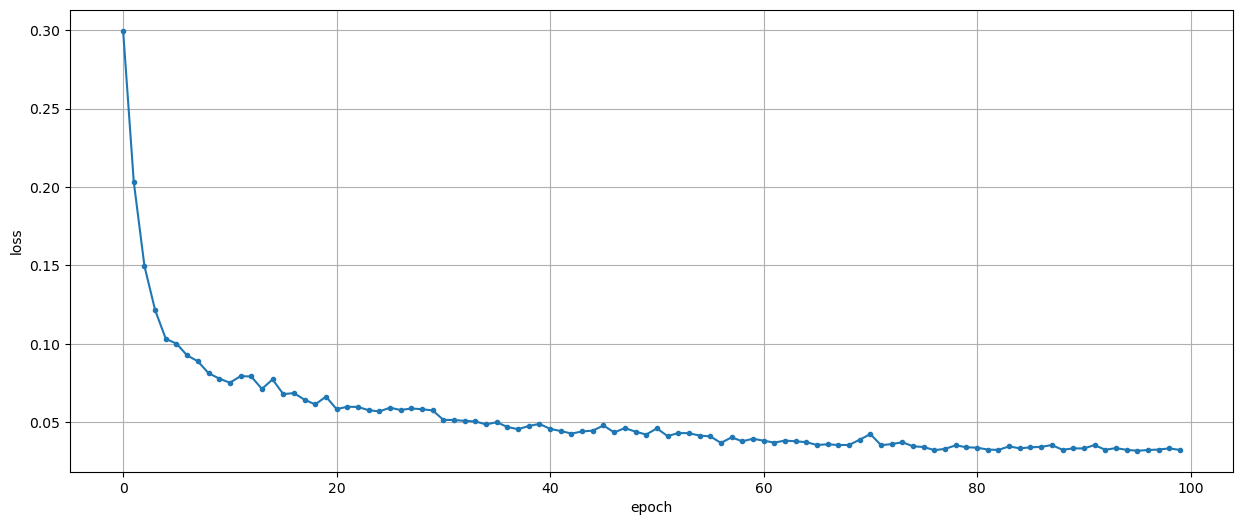

In [63]:
# Plot training history
h = history.history
epochs = range(len(h['loss']))
plt.plot(epochs, h['loss'], '.-'), plt.grid(True)
plt.xlabel('epoch'), plt.ylabel('loss')

[-0.00555836 -0.0072212   0.51116484  0.00153254  0.48671016  0.15670455
 -0.00681819 -0.00600412  0.30601048  0.20890835] [-0.00555836 -0.0072212   0.51116484  0.00153254  0.48671016  0.15670455
 -0.00681819 -0.00600412  0.30601048  0.20890835]


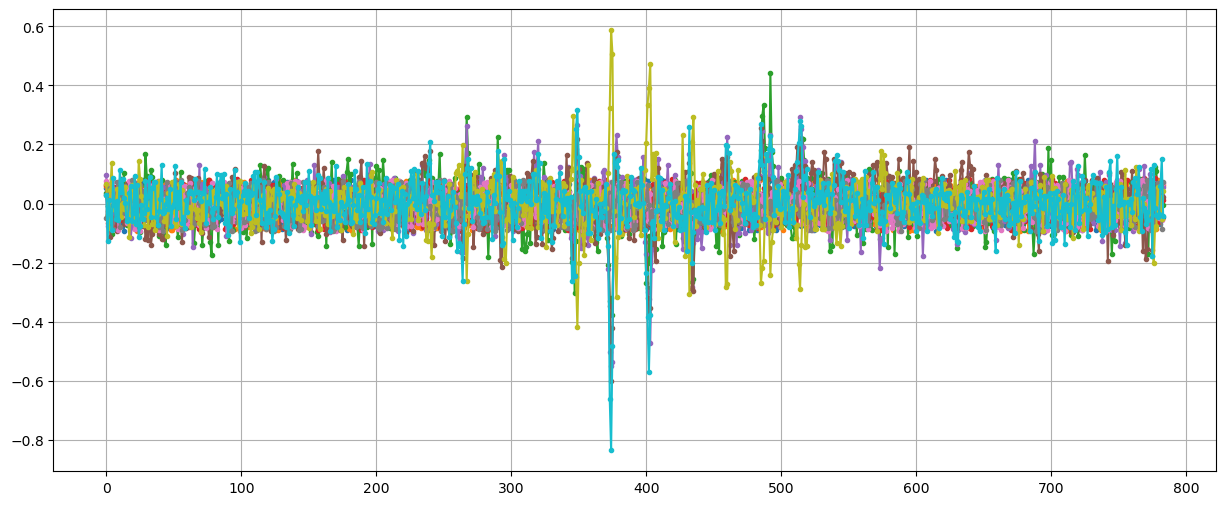

In [64]:
# Let's also have a looks at the learnt weights
plt.plot(model.layers[1].weights[0].numpy(), '.-'), plt.grid(True)
print(model.layers[1].weights[1].numpy(), model.layers[1].bias.numpy())

In [65]:
idx = 50
pred = model.predict(pixels[idx:idx+1, ...])
print(pred, labels[idx])

1/1 [==============================] - 0s 70ms/step
[[0.03839803]] 0


In [66]:
# Run it on the entire dataset
predictions = model.predict(pixels).squeeze()
predictions = predictions > 0.5

140/140 [==============================] - 0s 2ms/step


In [67]:
correct = 0
for prediction, label in zip(predictions, labels):
    if prediction == label:
        correct = correct + 1

print('Accuracy', correct/len(labels))

Accuracy 0.9771812080536912


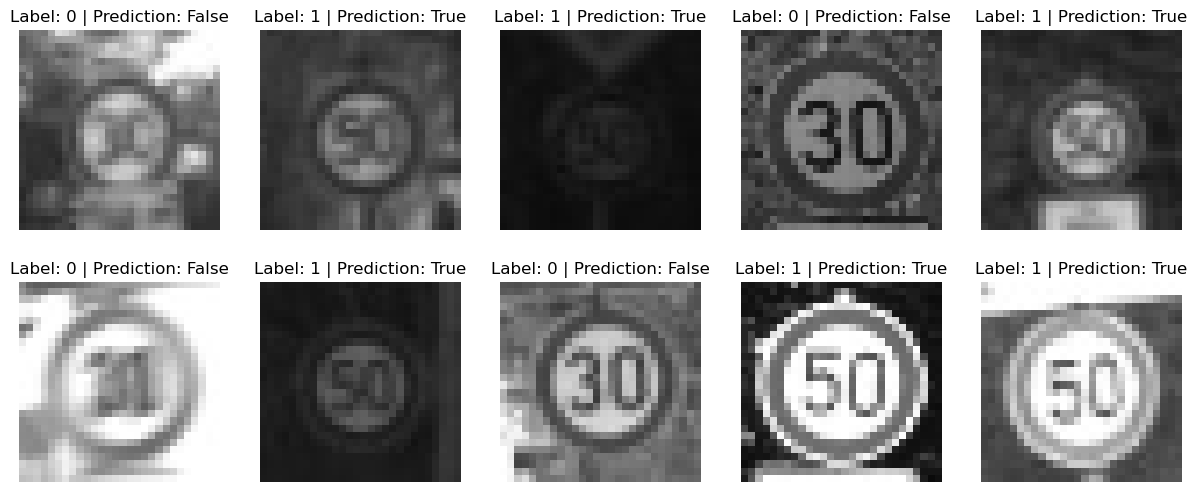

In [68]:
for cnt, idx in enumerate(np.random.randint(0, len(images), 10)): 
    plt.subplot(2,5,cnt+1), plt.imshow(images[idx], cmap='gray', vmin=0, vmax=255)
    plt.title('Label: ' + str(labels[idx]) + ' | Prediction: ' + str(predictions[idx]))
    plt.axis(False)